In [1]:
import sys
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_SigmoidProcessing import *
import pandas as pd
from matplotlib.gridspec import GridSpec

In [2]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

    
def GenericFigAxis():
    fig = plt.figure(figsize=[15,5])
    gs = GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]
    
def format_axes(fig):
    """
    Format a figure and 4 equidistant reveivers' lines from a single file. Receiver distance defines the color.
    """
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
        
    Lines = fig.axes[-1].get_lines()
    
    legend2 = fig.axes[-1].legend(Lines, ['2km','4km', '6km', '8km'], loc=1)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")

def Multi_format_axes(fig,cmap, LabelsPerColor):
    """
    Format a figure that contains different files with 
    information from several receivers for simulations under sets of blending parameters.
    """
    ColorDict = dict(enumerate(LabelsPerColor)) 
    
    
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
    Lines = []
    for idx,colcol in enumerate(cmap.colors):
        Lines.append(mlines.Line2D([], [], color = colcol,
                     linewidth = 3, label = ColorDict.get(idx)))
    
    legend2 = fig.axes[-1].legend(Lines, LabelsPerColor, loc = 2)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")
    

In [3]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_6

cmap = ListedColormap(Safe_6.mpl_colors[:])

In [5]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210315-Tilting/"
TiltedFile = LoadPickleFile(Filename = "P1-Tilt0.0-TPList_t1850_d125.12499999999999.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile1 = LoadPickleFile(Filename = "P1-Tilt10.0-TPList_t1850_d125.12499999999999.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "P1-Tilt20.0-TPList_t1850_d125.12499999999999.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile3 = LoadPickleFile(Filename = "P1-Tilt30.0-TPList_t1850_d125.12499999999999.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile4 = LoadPickleFile(Filename = "P1-Tilt40.0-TPList_t1850_d125.12499999999999.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile5 = LoadPickleFile(Filename = "P1-Tilt50.0-TPList_t1850_d125.12499999999999.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile6 = LoadPickleFile(Filename = "P2-Tilt60.0-TPList_t1636_d125.12499999999999.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile7 = LoadPickleFile(Filename = "P2-Tilt70.0-TPList_t1636_d125.12499999999999.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile8 = LoadPickleFile(Filename = "P2-Tilt80.0-TPList_t1636_d125.12499999999999.pickle",
                             FolderPath = FolderTiltedPath)

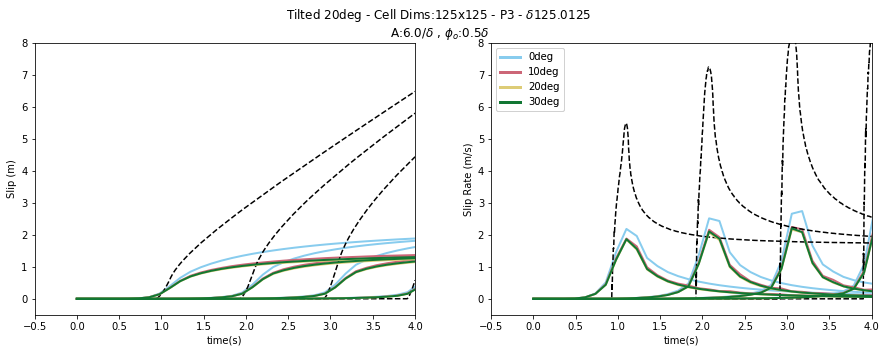

In [6]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 3
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["0deg","10deg","20deg","30deg"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:125x125 - P3 - $\delta$125.0125 \nA:6.0/$\delta$ , $\phi_o$:0.5$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

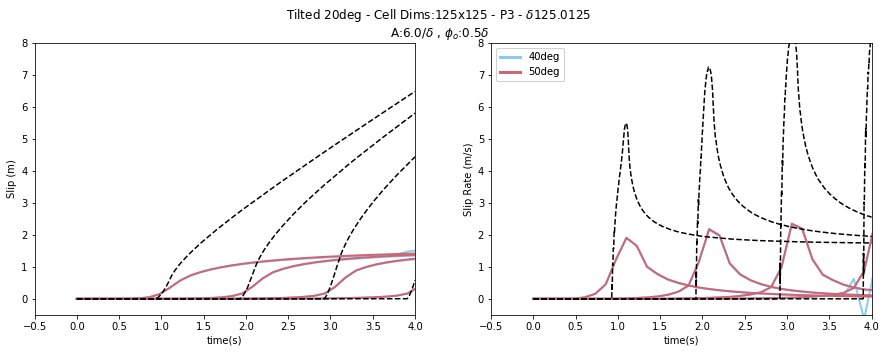

In [7]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile4[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile5[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    

    
LabelsPerColor= ["40deg","50deg"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:125x125 - P3 - $\delta$125.0125 \nA:6.0/$\delta$ , $\phi_o$:0.5$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

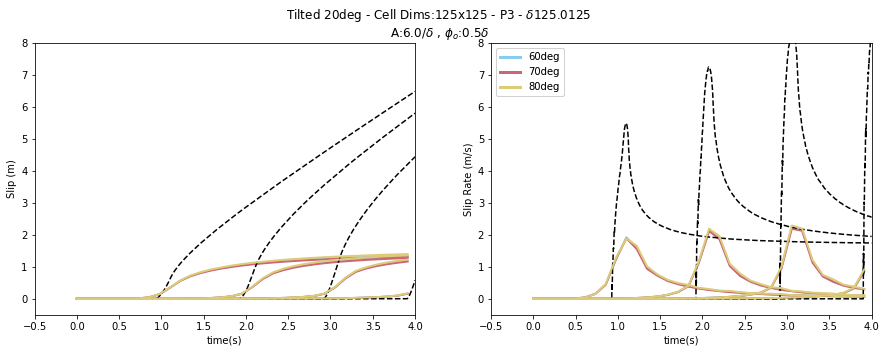

In [8]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile6[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile7[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile8[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 



    
LabelsPerColor= ["60deg","70deg","80deg"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:125x125 - P3 - $\delta$125.0125 \nA:6.0/$\delta$ , $\phi_o$:0.5$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

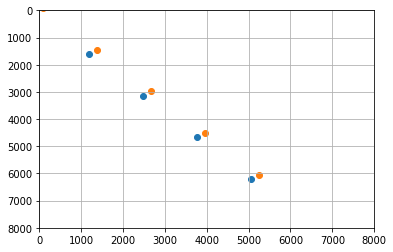

In [9]:
File = TiltedFile5


Locations1 = [Singles.Coord for Singles in File]
Locations2 = [Singles.TwinCoord for Singles in File]
x1, y1 = zip(*Locations1)
x2, y2 = zip(*Locations2)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0,8000])
ax.set_ylim([8000,0])
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.grid()

# Dy refinement and constant ratio / constant value delta

In [30]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210316-Tilting/"
TiltedFile = LoadPickleFile(Filename = "P1-Tilt0.0-TPList_t2045_d100.1.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile1 = LoadPickleFile(Filename = "P2-Tilt0.0-TPList_t2557_d80.07999999999998.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "P3-Tilt0.0-TPList_t4090_d50.05.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile3 = LoadPickleFile(Filename = "P4-Tilt0.0-TPList_t8180_d25.025.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile4 = LoadPickleFile(Filename = "P5-Tilt0.0-TPList_t2045_d125.1.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile5 = LoadPickleFile(Filename = "P6-Tilt0.0-TPList_t2557_d125.07999999999998.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile6 = LoadPickleFile(Filename = "P7-Tilt0.0-TPList_t4090_d125.05.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile7 = LoadPickleFile(Filename = "P8-Tilt0.0-TPList_t8180_d125.025.pickle",
                             FolderPath = FolderTiltedPath)

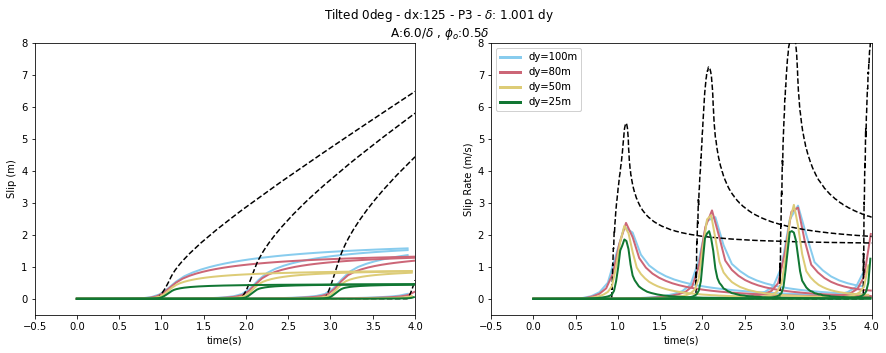

In [31]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 3
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["dy=100m","dy=80m","dy=50m","dy=25m"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 0deg - dx:125 - P3 - $\delta$: 1.001 dy \nA:6.0/$\delta$ , $\phi_o$:0.5$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

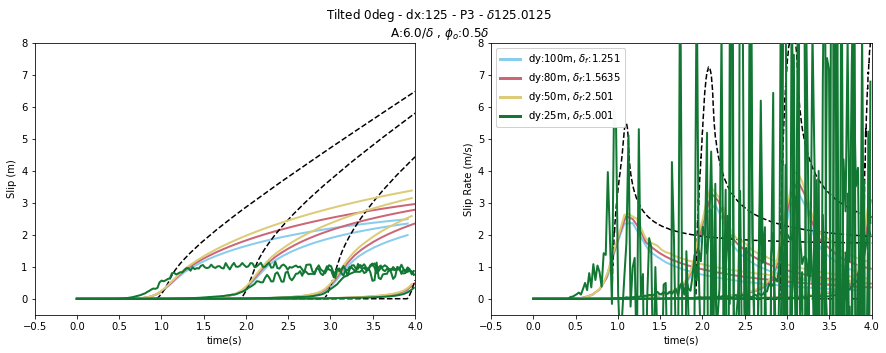

In [32]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile4[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile5[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile6[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 3
for Test1 in TiltedFile7[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["dy:100m, $\delta_f$:1.251","dy:80m, $\delta_f$:1.5635",
                 "dy:50m, $\delta_f$:2.501","dy:25m, $\delta_f$:5.001"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 0deg - dx:125 - P3 - $\delta$125.0125 \nA:6.0/$\delta$ , $\phi_o$:0.5$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

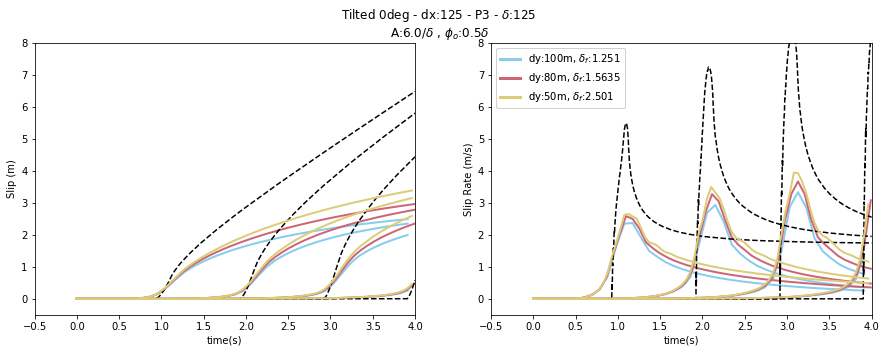

In [33]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile4[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile5[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile6[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["dy:100m, $\delta_f$:1.251","dy:80m, $\delta_f$:1.5635",
                 "dy:50m, $\delta_f$:2.501"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 0deg - dx:125 - P3 - $\delta$:125 \nA:6.0/$\delta$ , $\phi_o$:0.5$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

# Tilt 0 Uniaxial P1

In [34]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210316-Tilting/"
TiltedFile = LoadPickleFile(Filename = "PP1-Tilt0.0-TPList_t566_d100.1.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile1 = LoadPickleFile(Filename = "PP2-Tilt0.0-TPList_t707_d80.07999999999998.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "PP3-Tilt0.0-TPList_t1131_d50.05.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile3 = LoadPickleFile(Filename = "PP4-Tilt0.0-TPList_t2261_d25.025.pickle",
                             FolderPath = FolderTiltedPath)

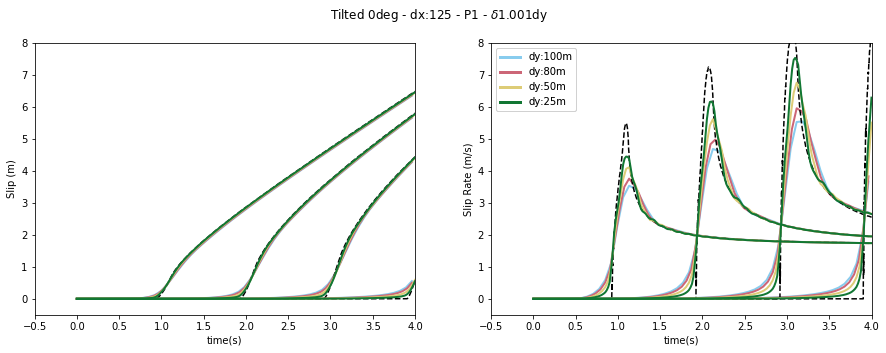

In [35]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 3
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["dy:100m","dy:80m",
                 "dy:50m","dy:25m"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 0deg - dx:125 - P1 - $\delta$1.001dy")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

# Testing P1 Constant delta 0 deg

In [93]:
try:
    del TiltedFile,TiltedFile1,TiltedFile2,TiltedFile3,TiltedFile4,TiltedFile5
    del TiltedFile6,TiltedFile7,TiltedFile8
except:
    pass

FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210317-Tilting/"
TiltedFile = LoadPickleFile(Filename = "P5-Tilt0.0-TPList_t566_d125.1.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile1 = LoadPickleFile(Filename = "P6-Tilt0.0-TPList_t707_d125.07999999999998.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "P7-Tilt0.0-TPList_t1131_d125.05.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile3 = LoadPickleFile(Filename = "P8-Tilt0.0-TPList_t2261_d125.025.pickle",
                            FolderPath = FolderTiltedPath)


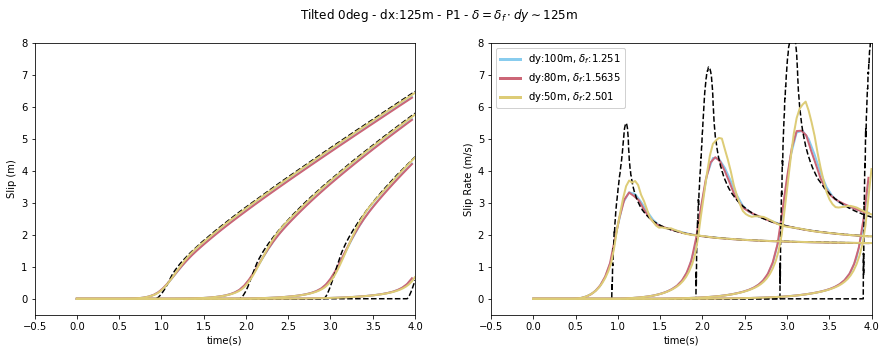

In [94]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

"""iidx = 3
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
"""

    
LabelsPerColor= ["dy:100m, $\delta_f$:1.251","dy:80m, $\delta_f$:1.5635",
                 "dy:50m, $\delta_f$:2.501"]#,"dy:25m, $\delta_f$:5.001"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 0deg - dx:125m - P1 - $\delta=\delta_f \cdot dy\sim$125m")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

In [95]:
try:
    del TiltedFile,TiltedFile1,TiltedFile2,TiltedFile3,TiltedFile4,TiltedFile5
    del TiltedFile6,TiltedFile7,TiltedFile8
except:
    pass


FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210317-Tilting/"
TiltedFile = LoadPickleFile(Filename = "PP1-Tilt20.0-TPList_t566_d125.1.pickle",
                            FolderPath = FolderTiltedPath)
TiltedFile1 = LoadPickleFile(Filename = "PP2-Tilt20.0-TPList_t707_d125.07999999999998.pickle",
                             FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "PP3-Tilt20.0-TPList_t1131_d125.05.pickle",
                            FolderPath = FolderTiltedPath)

TiltedFile3 = LoadPickleFile(Filename = "PP4-Tilt20.0-TPList_t2261_d125.025.pickle",
                            FolderPath = FolderTiltedPath)

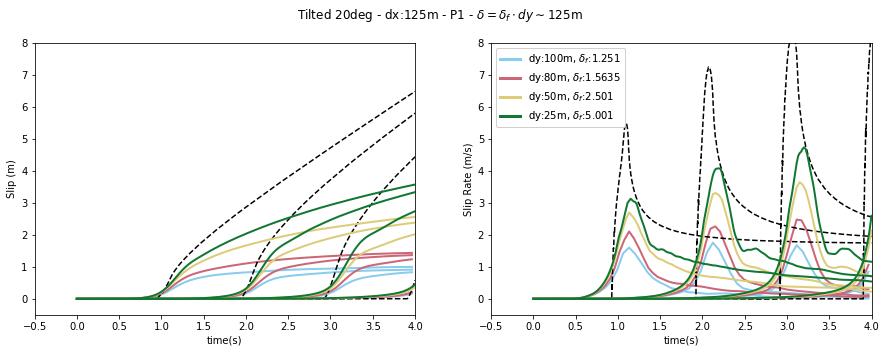

In [96]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
iidx = 3
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 



    
LabelsPerColor= ["dy:100m, $\delta_f$:1.251","dy:80m, $\delta_f$:1.5635",
                 "dy:50m, $\delta_f$:2.501","dy:25m, $\delta_f$:5.001"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - dx:125m - P1 - $\delta=\delta_f \cdot dy\sim$125m")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]